### Import Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

### Load Dataset

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

### Standardize Data

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Perform PCA

In [16]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
# Create df for the principal components
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X.shape[1])])
pca_df['Species'] = [target_names[label] for label in y]

# 1. Variance Explained Analysis

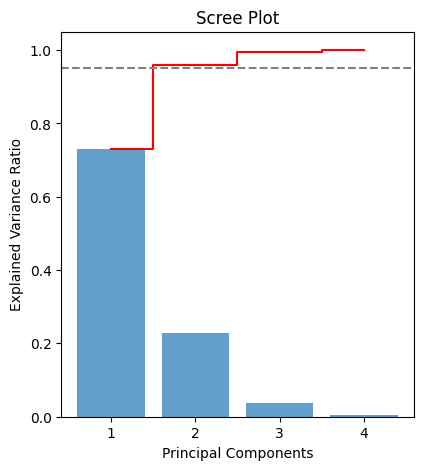

In [17]:
plt.figure(figsize=(10, 5))
# Scree plot
plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 
        alpha=0.7, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), 
         np.cumsum(pca.explained_variance_ratio_), 
         where='mid', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.axhline(y=0.95, color='gray', linestyle='--')  # 95% variance line

### Cumulative Variance

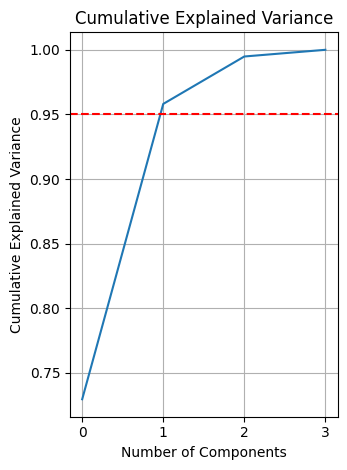

In [18]:
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
print("Explained variance per component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3f}")

Explained variance per component:
PC1: 0.730
PC2: 0.229
PC3: 0.037
PC4: 0.005


# 2. 2D PCA Visualization

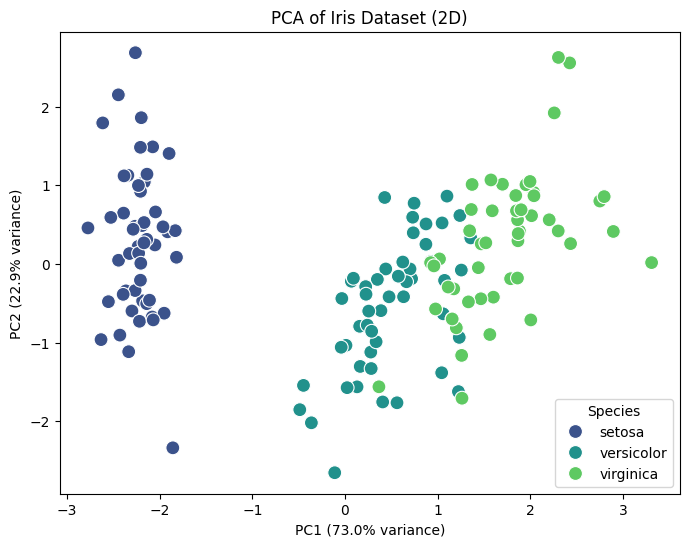

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, palette='viridis', s=100)
plt.title('PCA of Iris Dataset (2D)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.show()

# 3. Biplot (Features + Samples)

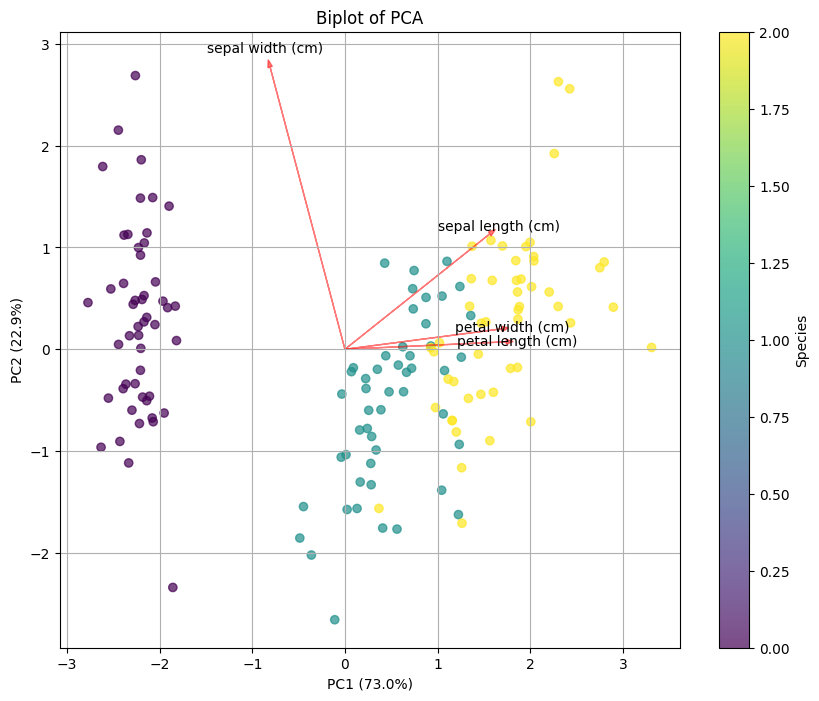

In [21]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    # Plot samples
    scatter = plt.scatter(xs, ys, c=y, cmap='viridis', alpha=0.7)
    # Plot feature arrows
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*3, coeff[i,1]*3, color='r', alpha=0.5, 
                 head_width=0.05)
        plt.text(coeff[i,0]*3.2, coeff[i,1]*3.2, labels[i], color='black', 
                ha='center', va='center')
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    plt.title('Biplot of PCA')
    plt.colorbar(scatter, label='Species')
    plt.grid()

biplot(X_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=feature_names)
plt.show()

# 4. Compare Original vs PCA Features

### Original Features

Text(0.5, 1.0, 'Original Features (Sepal)')

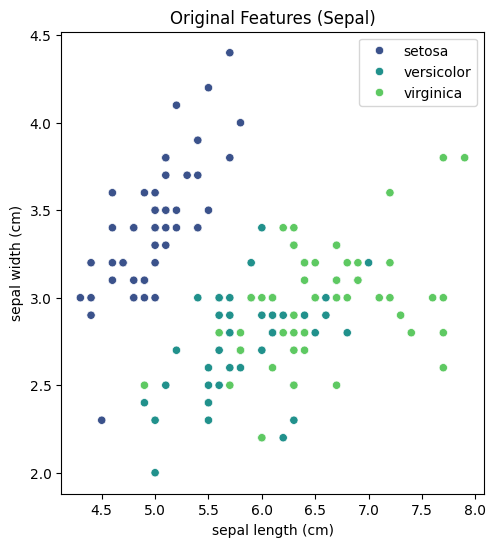

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=target_names[y], palette='viridis')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Original Features (Sepal)')


### PCA Features

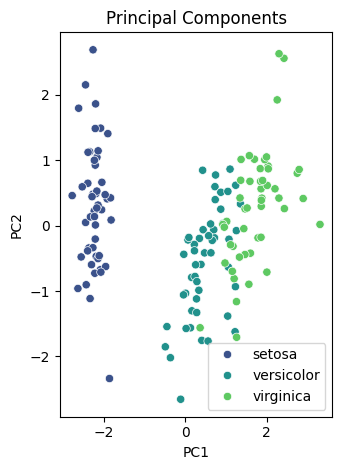

In [23]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=target_names[y], palette='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components')
plt.tight_layout()
plt.show()

# 5. Heatmap of PCA Loadings

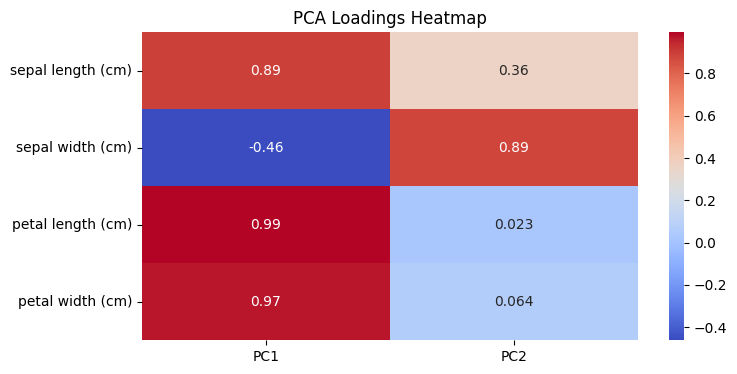

In [24]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 4))
sns.heatmap(loadings[:, :2], annot=True, cmap='coolwarm', 
            xticklabels=['PC1', 'PC2'], 
            yticklabels=feature_names)
plt.title('PCA Loadings Heatmap')
plt.show()